# FFT tutorial using numpy

[scipy doc](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

In [1]:
# general libs we'll use
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## generate a signal that we can use

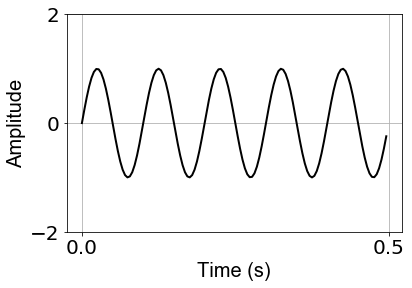

In [11]:
sr = 256                        # samp rate in Hz
f = 10                          # frequency of signal 
tmax = .5                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a sin wave
sw = np.sin(2*pi*f*t)

plt.plot(t, sw, 'k-', linewidth = 2)    # specify x,y data...convert rad to deg for x-axis

plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)

plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)

plt.yticks((-2,0,2), color='k', size=20)


# grid?
plt.grid(1)

# show it
plt.show()

## do the fft and plot
[legend help page](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

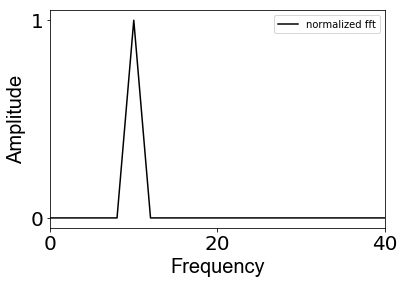

In [12]:
# normalize by the number of data points, which is dividing by number of positive frequencies or just dt
sp = np.fft.rfft(sw)     

amp = (np.abs(sp)  / len(sw) ) * 2

freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!

plt.plot(freq, amp, 'k')            # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

In [9]:
len(sw)

512

### more complex input...

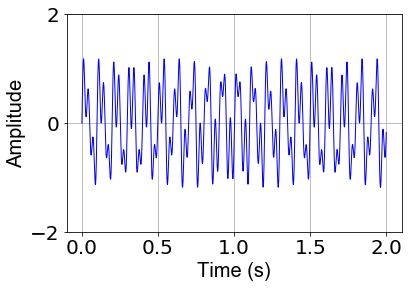

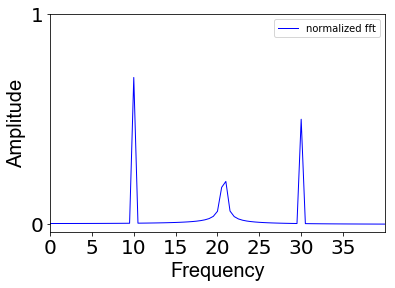

In [29]:
# make a new signal to FFT...combo of sin waves
sr = 1024                       # samp rate in Hz
f = np.array([10,20.77,30])        # frequency of signal 
amp = np.array([.7,.3,.5])
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a more complex sin wave
sw = amp[0]*np.sin(2*pi*f[0]*t)+amp[1]*np.sin(2*pi*f[1]*t)+amp[2]*np.sin(2*pi*f[2]*t)

# plot the signal...
plt.plot(t, sw, 'b-', linewidth = 1)    
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)
plt.yticks((-2,0,2), color='k', size=20)
plt.grid(1)
plt.show()

sp = np.fft.rfft(sw)             # normalize by the number of data points, which is dividing by number of positive frequencies or just dt
amp = (np.abs(sp) / len(sw)) *2
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
plt.plot(freq, amp, 'b', linewidth=1)            # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

### Nyquist limit...
N=fs/dF where dF is the desired frequency interval

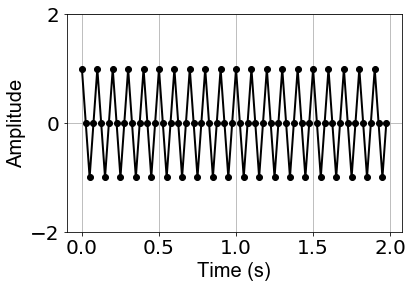

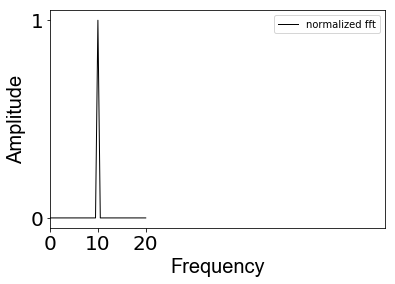

In [23]:
sr = 40                        # samp rate in Hz
f = 10                          # frequency of signal 
tmax = 2                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a cos wave
sw = np.cos(2*pi*f*t)

plt.plot(t, sw, 'ko-', linewidth = 2)    # specify x,y data...convert rad to deg for x-axis
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)
plt.yticks((-2,0,2), color='k', size=20)
plt.grid(1)
plt.show()

# FFT
sp = np.fft.rfft(sw)                  # fft
amp = (np.abs(sp) / len(sw)) * 2      # normalize by the number of data points
freq = np.fft.rfftfreq(sw.size, dt)   # Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
plt.plot(freq, amp, 'k', linewidth=1)            # plot amplitude (power = np.absolute(sp)**2)
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0::20], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 70])
plt.show()

In [11]:
freq

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])